In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import cv2
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [15]:
flame_dir = "Flame_cropped/"
fire_dir = "Fire_full/"

def prep_img(file_path):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(file_path)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)


In [16]:
flame_files = os.listdir(flame_dir)
fire_files = os.listdir(fire_dir)

model = load_model("64x2-CNN_downsized_new.model")

[[693  62]
 [ 20 462]]
Precision:  0.8816793893129771
Recall:  0.9585062240663901


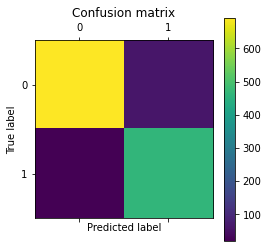

In [17]:
y_pred = []
y_true = []
for filename in flame_files:

    img = prep_img(flame_dir + filename)
    prediction = model.predict([img])
    y_pred.append(int(prediction[0][1]))
    y_true.append(1)  # 1 represents "flame" class

for filename in fire_files:
    img = prep_img(fire_dir + filename)
    prediction = model.predict([img])
    y_pred.append(int(prediction[0][1]))
    y_true.append(0)  # 0 represents "fire" class

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Predict the classes of the images


# Compute and plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
print("Precision: ",precision_score(y_true, y_pred))
print("Recall: ",recall_score(y_true, y_pred))
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

